In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline

In [2]:
from plots import line_CI_plot

In [3]:
def prop_na(dataframe):
    # each column with nans will have the minimum value of that col
    # used to replace the nan
    for col in dataframe.columns:
        fval = dataframe[col].min()
        filled_col = dataframe[col].fillna(fval)
        dataframe[col] = filled_col
    return dataframe

In [4]:
def load_data_CI(files):
    dfs = [pd.read_csv(file, index_col=1)[["Value"]] for file in files]
    data = pd.concat(dfs, axis=1)
    data.columns = [str(i) for i in range(data.shape[1])]
    data = prop_na(data)
    mean = data.mean(axis=1)
    stderr = data.std(axis=1, ddof=0)/(~data.isna()).sum(axis=1).apply(np.sqrt)
    low_CI = (mean - 1.96*stderr)
    high_CI = (mean + 1.96*stderr)
    return (mean, low_CI, high_CI)

In [5]:
outSEQ_fs = ["/home/dillon/Downloads/run_pre_1l_256u_0.3d_0.3rd_outSEQ_softmax_LNx_sub1-tag-eval_loss.csv",
             "/home/dillon/Downloads/run_pre_outSEQ_1l_256u_0.3d_0.3rd_sub2-tag-eval_loss.csv",
             "/home/dillon/Downloads/run_pre_outSEQ_1l_256u_0.3d_0.3rd_sub3-tag-eval_loss.csv",
             "/home/dillon/Downloads/run_pre_outSEQ_1l_256u_0.3d_0.3rd_sub4-tag-eval_loss.csv",
             "/home/dillon/Downloads/run_pre_outSEQ_1l_256u_0.3d_0.3rd_sub5-tag-eval_loss.csv"]
elmoSEQ_fs = ["/home/dillon/Downloads/run_pre_elmoSEQ_1l_256u_0.3d_0.3rd_sub1-tag-eval_loss.csv",
              "/home/dillon/Downloads/run_pre_elmoSEQ_1l_256u_0.3d_0.3rd_sub2-tag-eval_loss.csv",
              "/home/dillon/Downloads/run_pre_elmoSEQ_1l_256u_0.3d_0.3rd_sub3-tag-eval_loss.csv"]


In [6]:
mean1, low_CI1, high_CI1 = load_data_CI(outSEQ_fs)
mean2, low_CI2, high_CI2 = load_data_CI(elmoSEQ_fs)

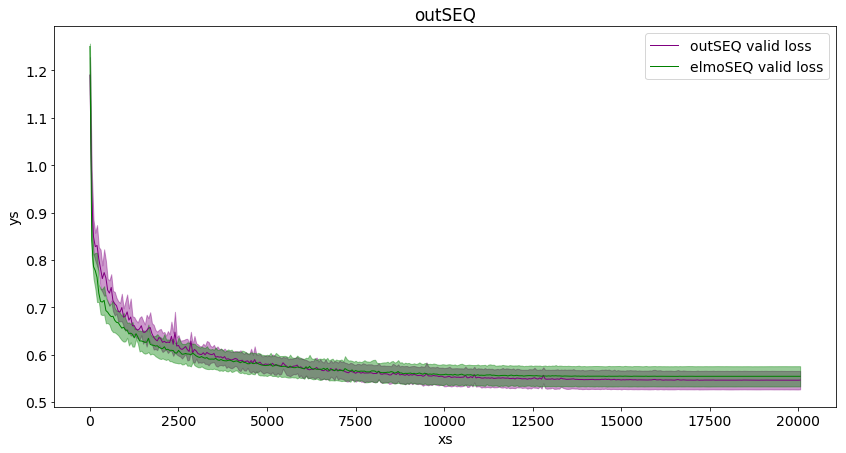

In [7]:
line_CI_plot([mean1.index.values,
              mean2.index.values], 
             [mean1.values,
              mean2.values], 
             [mean1.index.values,
              mean2.index.values], 
             [low_CI1.values,
              low_CI2.values], 
             [high_CI1.values,
              high_CI2.values], 
             ["outSEQ valid loss",
              "elmoSEQ valid loss"], 
             ["purple", "green"], 
             "xs", "ys", "outSEQ")